In [ ]:
# https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/caltech.py

In [ ]:
# !pip install tensorflow-datasets

In [1]:
import os
import numpy as np
import tensorflow.compat.v2 as tf
import tensorflow_datasets.public_api as tfds
from tensorflow import keras
import matplotlib.pyplot as plt

아래의 코드를 이용하여 사용할 데이터 셋이 tfds를 통해 로드 가능한지 확인 & local에 저장

In [ ]:
tfds.list_builders()

In [2]:
ds = tfds.load('caltech101', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

<_OptionsDataset shapes: {image: (None, None, 3), image/file_name: (), label: ()}, types: {image: tf.uint8, image/file_name: tf.string, label: tf.int64}>


첫 10개의 샘플 데이터 표시

,image,image/file_name,label
0,,image_0030.jpg,70 (pagoda)
1,,image_0041.jpg,10 (brain)
2,,image_0009.jpg,51 (inline_skate)
3,,image_0031.jpg,7 (beaver)
4,,image_0060.jpg,87 (starfish)
5,,image_0028.jpg,79 (saxophone)
6,,image_0064.jpg,94 (umbrella)
7,,image_0073.jpg,54 (ketch)
8,,image_0015.jpg,99 (windsor_chair)
9,,image_0012.jpg,83 (sea_horse)

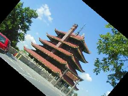
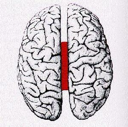
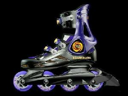
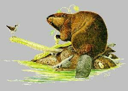
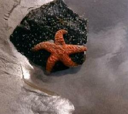
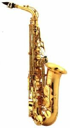
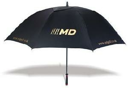
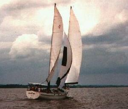
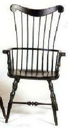
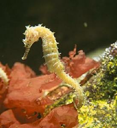

In [8]:
ds, info = tfds.load('caltech101', split='train', with_info=True)

tfds.as_dataframe(ds.take(10), info)

위와 비슷한 기능

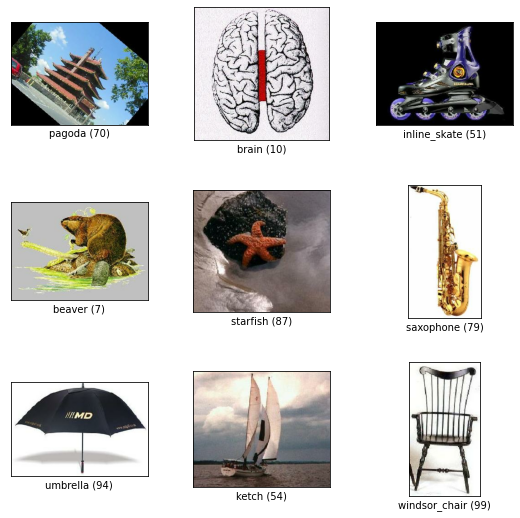

In [11]:
fig = tfds.show_examples(ds, info)

In [7]:
print(info)

tfds.core.DatasetInfo(
    name='caltech101',
    full_name='caltech101/3.0.1',
    description="""
    Caltech-101 consists of pictures of objects belonging to 101 classes, plus
    one `background clutter` class. Each image is labelled with a single object.
    Each class contains roughly 40 to 800 images, totalling around 9k images.
    Images are of variable sizes, with typical edge lengths of 200-300 pixels.
    This version contains image-level labels only. The original dataset also
    contains bounding boxes.
    """,
    homepage='http://www.vision.caltech.edu/Image_Datasets/Caltech101/',
    data_path='C:\\Users\\fibik\\tensorflow_datasets\\caltech101\\3.0.1',
    download_size=125.64 MiB,
    dataset_size=132.86 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/file_name': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=102),
    }),
    supervised_keys=('image', '

이미지의 크기가 고정되어 있지 않음. 3개의 channel로 구성됨.

In [8]:
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/file_name': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=102),
})

In [9]:
print(info.features["label"].num_classes)
print(info.features["label"].names)

102
['accordion', 'airplanes', 'anchor', 'ant', 'background_google', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'faces', 'faces_easy', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'leopards', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'motorbikes', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy'

alexnet은 227x227 이므로 resize필요